In [18]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score

In [19]:
# Reading the dataset
df = pd.read_parquet('final_dataset.parquet')

# Replacing NaN values with 0
df = df.fillna(0)

In [20]:
df.head()

,date,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca,target
0,2010-02-14,0.0,36,13,20.52,136.0,3.619512,0.190574,0
1,2010-02-15,0.0,41,7,20.51,129.0,3.470118,0.209177,0
2,2010-02-16,0.0,43,8,20.51,130.0,3.433721,0.197542,0
3,2010-02-17,0.0,51,10,20.51,132.0,3.351107,0.135033,0
4,2010-02-18,0.0,51,16,20.50,135.0,3.238121,0.107690,0


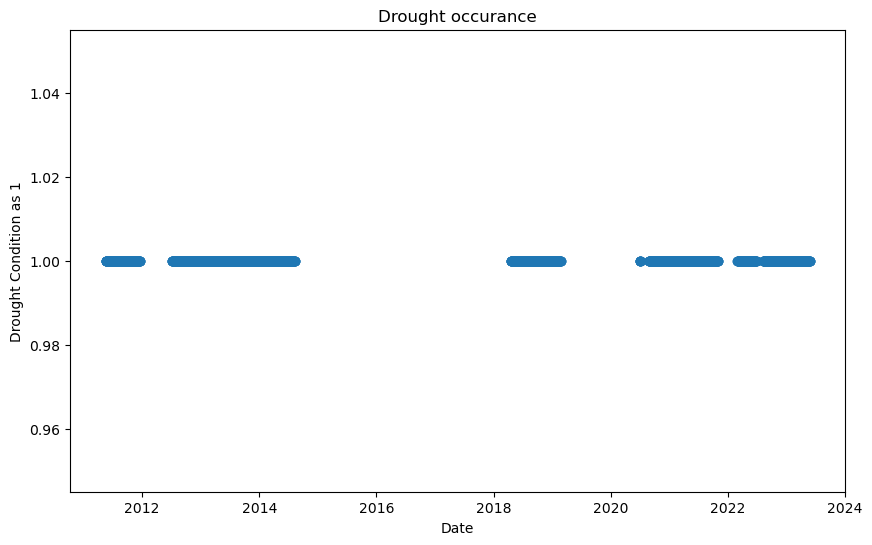

In [21]:
# Visualizing where target variable is 1 i.e there is drought

plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 1]['date'], df[df['target'] == 1]['target'])
plt.title('Drought occurance')
plt.xlabel('Date')
plt.ylabel('Drought Condition as 1')
plt.show()


In [22]:
# following are the features list

features = ['precip', 'max_temp', 'min_temp', 'gwl', 'daily_discharge_cfs','sm_pca', 'st_pca']
target = 'target'

In [23]:
# Checking for multicollinearity between features

corr = df[features].corr()
corr.style.background_gradient(cmap='coolwarm')


,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
precip,1.000000,-0.032593,0.104749,-0.024576,0.206089,-0.024596,-0.001298
max_temp,-0.032593,1.000000,0.861268,0.063881,0.010227,-0.390845,-0.302978
min_temp,0.104749,0.861268,1.000000,0.046226,0.101598,-0.406750,-0.333921
gwl,-0.024576,0.063881,0.046226,1.000000,-0.056801,0.019720,-0.452011
daily_discharge_cfs,0.206089,0.010227,0.101598,-0.056801,1.000000,0.024787,0.018521
sm_pca,-0.024596,-0.390845,-0.406750,0.019720,0.024787,1.000000,0.312463
st_pca,-0.001298,-0.302978,-0.333921,-0.452011,0.018521,0.312463,1.000000


We can see that there is correlation between max_temp and min_temp, but as per the domain knowledge, we know that these two features are important and we should keep them

In [24]:
# Displaying the data before splitting

display(df[features].head())

display(df[[target]].head())

,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
0,0.0,36,13,20.52,136.0,3.619512,0.190574
1,0.0,41,7,20.51,129.0,3.470118,0.209177
2,0.0,43,8,20.51,130.0,3.433721,0.197542
3,0.0,51,10,20.51,132.0,3.351107,0.135033
4,0.0,51,16,20.50,135.0,3.238121,0.107690


,target
0,0
1,0
2,0
3,0
4,0


In [25]:
# Splitting the dataset into the Training set and Test set and Validation set

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.15, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [26]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts())

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

target
0    1884
1    1434
Name: count, dtype: int64

target
0    399
1    334
Name: count, dtype: int64

In [27]:
# display the data after splitting

# Training set
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(y_train).head())

# Test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())


,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
3187,0.00,65,21,21.39,132.0,0.611336,0.907899
1189,0.03,85,61,20.87,29.3,-0.408119,2.194220
4566,0.05,22,6,22.23,76.6,1.121847,-0.481679
4310,0.06,18,7,21.76,81.3,0.539386,2.331650
4321,0.00,64,31,21.71,77.0,1.582602,1.921310


,target
3187,1
1189,1
4566,1
4310,0
4321,1


,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
2857,0.01,47,22,21.16,170.0,2.224886,2.490720
2373,0.00,75,30,21.73,100.0,0.893778,-1.718663
1065,0.00,48,17,21.00,78.3,0.303675,0.066434
2287,0.00,97,60,21.31,112.0,-0.647494,-0.541322
1675,0.00,80,42,21.45,163.0,-0.127969,-1.816134


,target
2857,0
2373,0
1065,1
2287,0
1675,0


In [28]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [29]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3,4,5,6
0,-0.235013,-0.302859,-0.913856,0.112534,-0.077808,0.478475,0.532062
1,-0.009515,0.687420,1.260798,-1.088586,-0.466619,-0.260108,1.294874
2,0.140817,-2.431959,-1.729352,2.052803,-0.287546,0.848334,-0.291984
3,0.215984,-2.630015,-1.674985,0.967176,-0.269753,0.426348,1.376373
4,-0.235013,-0.352373,-0.370193,0.851684,-0.286032,1.182146,1.133033


In [30]:
'''
This script sets up a basic feed-forward neural network using Keras. 
It includes defining the model structure (with one hidden layer and one output layer),
compiling the model with an optimizer and loss function suitable for binary classification, 
training the model on a dataset, and finally making predictions on a scaled test set.

'''

# Initializing the ANN
model = keras.Sequential()

'''
keras.Sequential(): This initializes a sequential model, which means that layers will be added in a linear stack. 
This is the simplest type of model where each layer has exactly one input tensor and one output tensor.

'''

# Adding the input layer and the first hidden layer
model.add(keras.layers.Dense(units = 7, activation = 'relu'))

'''
keras.layers.Dense: This adds a dense (fully connected) layer to the model.
units=7: This specifies that the layer has 7 neurons.
activation='relu': This uses the Rectified Linear Unit (ReLU) activation function, 
                    which introduces non-linearity by outputting the input directly if
                    it’s positive, and zero otherwise.
'''

# Adding the output layer
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

'''
Another Dense layer is added as the output layer.
units=1:               This specifies that there is only one neuron in this layer, suitable for binary classification tasks.
activation='sigmoid': This activation function squashes the output to a range between 0 and 1, 
                       which is useful for binary classification.
'''

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

'''
optimizer='adam':            This specifies the optimization algorithm. Adam is an adaptive learning rate optimization 
                             algorithm that adjusts the learning rate during training.
loss='binary_crossentropy':  This specifies the loss function used for binary classification problems.
                             Binary cross-entropy measures the performance of a classification model whose 
                             output is a probability value between 0 and 1.
metrics=['accuracy']:        This tells the model to evaluate its performance using accuracy as a metric.

'''

# Training the ANN on the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 50)

'''
X_train and y_train:  These are the training data and labels, respectively.
batch_size=10:        This specifies that the model will update its weights after processing every 10 samples.
epochs=50:            This specifies the number of times the model will iterate over the entire training dataset.

'''

# Scaling the test set
X_test_ = sc.transform(X_test)

'''
sc.transform(X_test): This assumes there is a scaler object sc (such as StandardScaler from scikit-learn) used to 
scale or normalize the test data (X_test) to be in the same range as the training data.
'''


# Predicting the Test set results
y_pred = model.predict(X_test_)

'''
model.predict(X_test_): This generates predictions for the test data. The output will be the predicted probabilities of
the positive class (since the output layer uses a sigmoid activation function).
'''



Epoch 1/50
332/332 [==============================] - 1s 954us/step - loss: 0.6905 - accuracy: 0.5588
Epoch 2/50
332/332 [==============================] - 0s 909us/step - loss: 0.6473 - accuracy: 0.6127
Epoch 3/50
332/332 [==============================] - 0s 894us/step - loss: 0.6304 - accuracy: 0.6166
Epoch 4/50
332/332 [==============================] - 0s 925us/step - loss: 0.6223 - accuracy: 0.6215
Epoch 5/50
332/332 [==============================] - 0s 880us/step - loss: 0.6170 - accuracy: 0.6224
Epoch 6/50
332/332 [==============================] - 0s 896us/step - loss: 0.6129 - accuracy: 0.6278
Epoch 7/50
332/332 [==============================] - 0s 895us/step - loss: 0.6092 - accuracy: 0.6284
Epoch 8/50
332/332 [==============================] - 0s 906us/step - loss: 0.6057 - accuracy: 0.6341
Epoch 9/50
332/332 [==============================] - 0s 858us/step - loss: 0.6027 - accuracy: 0.6377
Epoch 10/50
332/332 [==============================] - 0s 938us/step - loss: 0.599

'\nmodel.predict(X_test_): This generates predictions for the test data. The output will be the predicted probabilities of\nthe positive class (since the output layer uses a sigmoid activation function).\n'

Accuracy: 0.6507503410641201
F1 Score: 0.6012461059190032
Recall Score: 0.5778443113772455


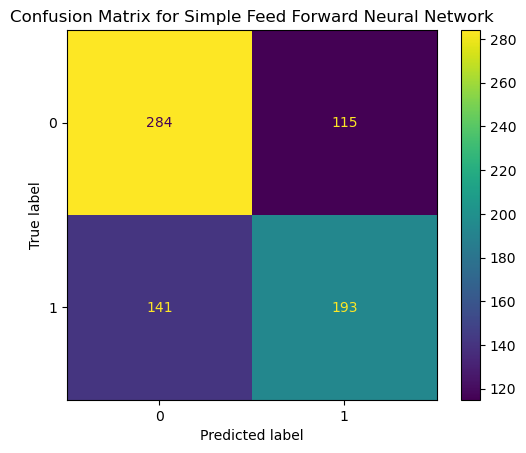

In [31]:
# Generating the confusion matrix for the model


y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Simple Feed Forward Neural Network')

# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

### Model Optimization

In [38]:
# Model Optimization

'''
This code defines a function for creating, training, and evaluating
a neural network model using TensorFlow/Keras, with several key components
including model architecture, optimization, and callbacks for training monitoring. 

'''
# Preprocessing Validation Data

X_val_ = sc.transform(X_val)

'''
sc.transform(X_val): Scales or normalizes the validation data X_val using a previously defined scaler sc. 
This ensures that the validation data is in the same scale or distribution as the training data.

'''
# Defining the create_model Function

def create_model(act_function, neurons, f, bs):
    '''
    This function creates, compiles, trains, and evaluates a neural network model.
    It takes four parameters:

    act_function: The activation function for the hidden layer.

    neurons: The number of neurons in the hidden layer.

    f: The factor for reducing the learning rate.

    bs: The batch size used during training.

    '''
    #Model Architecture
    model = keras.Sequential() # Initializes a sequential model where layers are stacked in a linear fashion.

    model.add(keras.layers.Dense(units = neurons, activation = act_function, input_shape = (7,), kernel_initializer = tf.keras.initializers.LecunNormal()))
    
    '''
    keras.layers.Dense(units=neurons, activation=act_function): Adds a dense (fully connected) layer with neurons number of neurons and the activation function specified by act_function.
    input_shape=(7,): Specifies that the input layer expects 7 features.
    kernel_initializer=tf.keras.initializers.LecunNormal(): Initializes the weights of this layer using the LeCun normal initializer, which is suitable for layers with ReLU activations.
    
    '''
    model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))
    
    '''
    Adds an output layer with 1 neuron and a sigmoid activation function, suitable for binary classification tasks.
    
    '''
 
     # Compiling the Model
    
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.0001, clipnorm=True)
   # model.compile(optimizer = optimiser, loss = 'binary_crossentropy', metrics = 'accuracy', )
    model.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=['accuracy'])

    '''
    tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.0001, clipnorm=True): 
    Configures the Adam optimizer with a learning rate of 0.001 and a small epsilon value to prevent division by zero. 
    clipnorm=True helps to avoid exploding gradients by clipping the gradients during optimization.
    model.compile(...): Compiles the model with the Adam optimizer, 
    binary cross-entropy loss (appropriate for binary classification), and accuracy as a performance metric.
    
    '''
    
    # Callbacks for training 

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=3, restore_best_weights=True)
    
    '''
    EarlyStopping: Monitors the validation loss (val_loss) and stops training if it does not improve for 3
    consecutive epochs. restore_best_weights=True ensures that the model weights are 
    reverted to the best observed during training.
    '''
    
    rlrnop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=f, patience=1, verbose=1)
    
    '''
    ReduceLROnPlateau: Reduces the learning rate by a factor f when the validation loss plateaus (doesn’t improve) for 1 epoch. 
    This helps in fine-tuning the model when it gets stuck in a local minimum.
    
    '''
    # Training the Model 
    log = model.fit(X_train, y_train, validation_data=(X_val_, y_val), epochs=150, batch_size=bs, callbacks=[es, rlrnop], verbose=0)
    '''
    
    model.fit(...): Trains the model on X_train and y_train, using X_val_ and y_val for validation. 
    The training runs for up to 150 epochs with a batch size of bs. 
    The callbacks es and rlrnop are used for early stopping and learning rate adjustment.
        '''
    
    # Plotting Loss Curves
    loss = log.history['loss']
    val_loss = log.history['val_loss']
    
    plt.figure(figsize=(15, 6))
    # Plot Training Loss
    plt.plot(loss, label='Training loss', color='blue')
    plt.plot(val_loss, label='Validation loss', color='red')
    plt.title('Training and Validation Loss for act_function={},Neurons={}, Factor Size ={}, Batch Size={}'.format(act_function, neurons, f, bs))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    '''
    log.history['loss'] and log.history['val_loss']: Retrieve the training and validation loss values
    recorded during the training process.
    plt.plot(...): Plots the training and validation loss over epochs to visualize the 
    learning progress and detect potential overfitting.
       
    '''
    
    # Return Statement 
    return model, log

    '''
    model: The trained model.
    log: The training log containing the loss history.
    '''
    
    '''
    ******************************************************************************************************************
    ALL in all, this function sets up a neural network with configurable parameters for activation function,
    number of neurons, learning rate adjustment, and batch size.
    It then trains the model, monitors its performance with callbacks, and plots the training and validation loss to
    evaluate the model’s performance visually.
    ********************************************************************************************************************
    '''


Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 59: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 62: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 63: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 65: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 66: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 67: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 68: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 66.

Epoch 69: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 69: early stopping


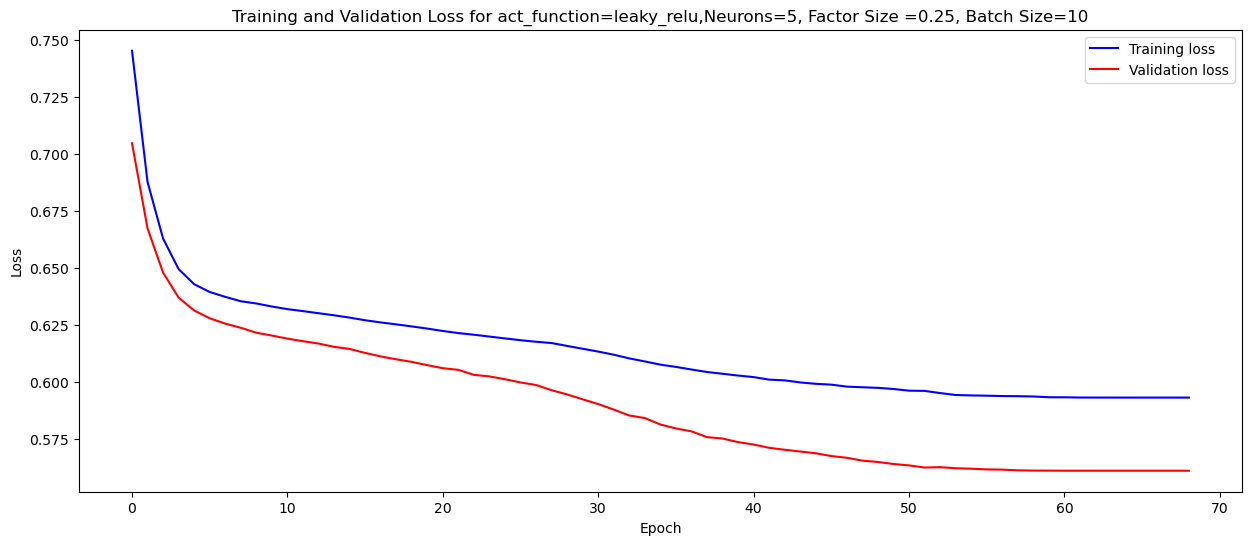


Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 55: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 58: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 60: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 61: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 62: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 66: ReduceLROnPlateau reducing learning rate to 6.710

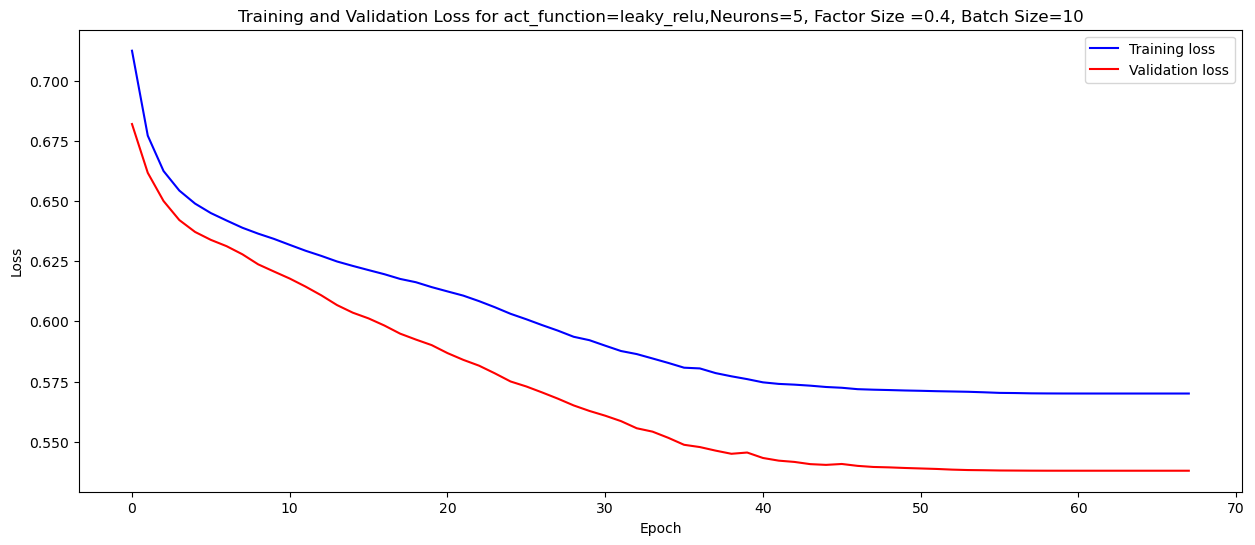


Epoch 48: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 61: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 62: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 64: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 65: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 66: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 67: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 68: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 69: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 70: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 71: ReduceLROnPlateau reducing learning rate to 1.22070

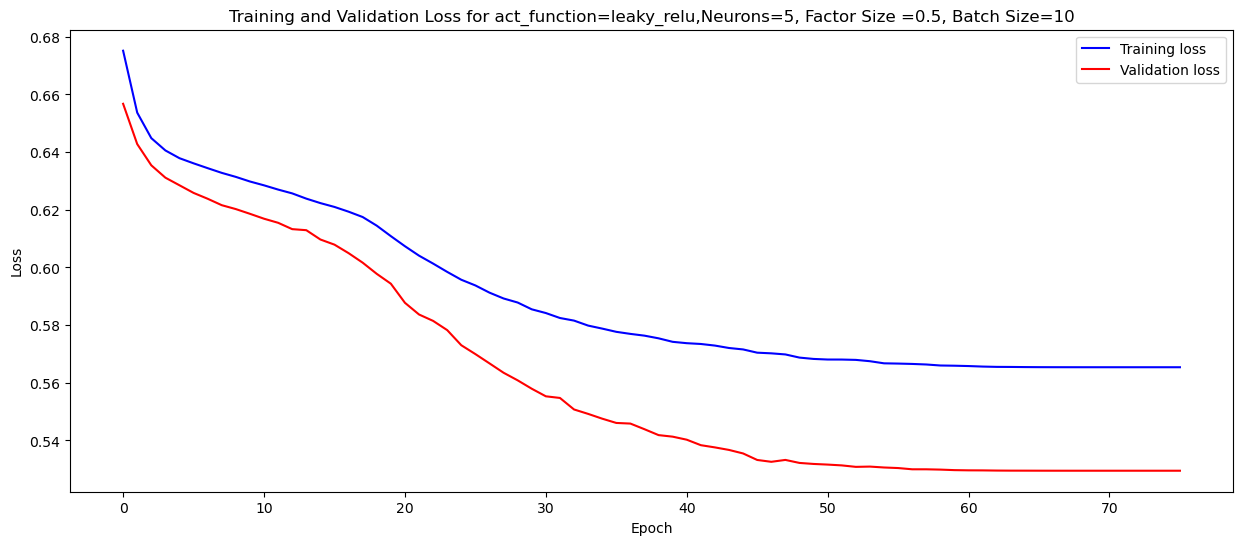


Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 68: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 71: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 73: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 74: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 75: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 76: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 77: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 78: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 79: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 77.

Epoch 80: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 80: early stopping


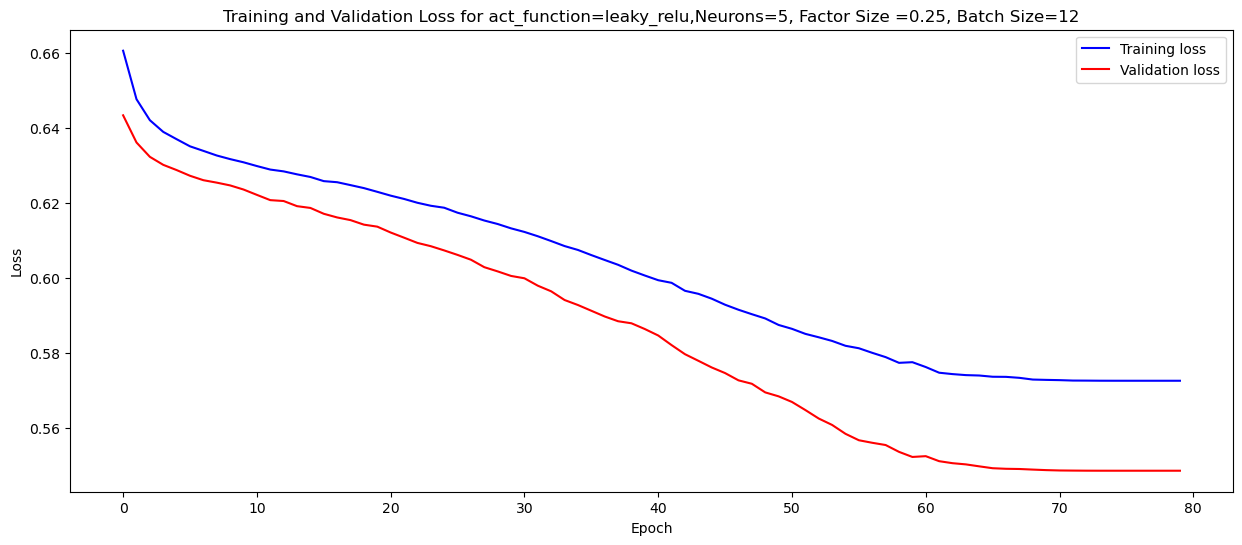


Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 42: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 43: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 45: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 46: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 47: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 48: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 49: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 50: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 51: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 52: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 53: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.
Restoring model weights from the end of the best epoch: 51.


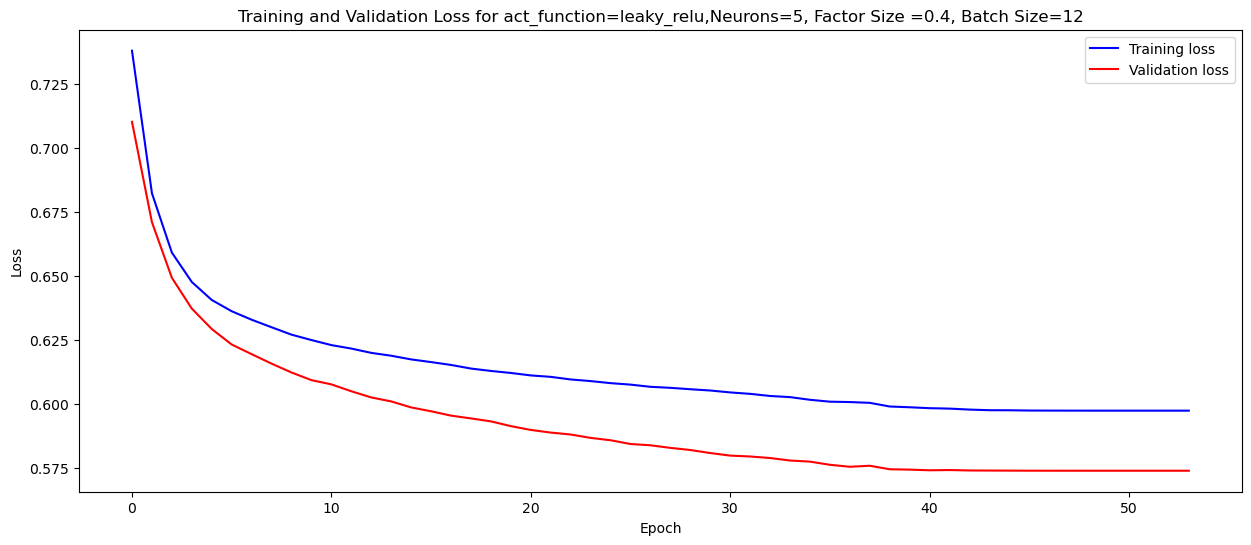


Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 114: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 119: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 127: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 129: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 131: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 132: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 133: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 134: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 135: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 136: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 137: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 138: ReduceLROnPlateau reducing learning rat

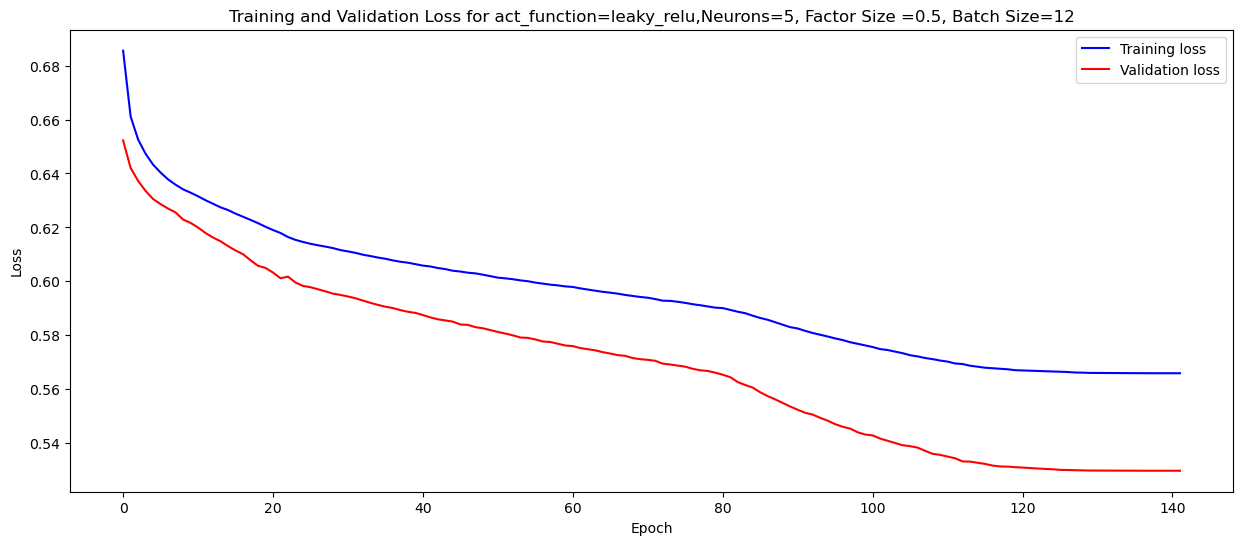


Epoch 48: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 57: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 63: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 66: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Restoring model weights from the end of the best epoch: 64.

Epoch 67: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 67: early stopping


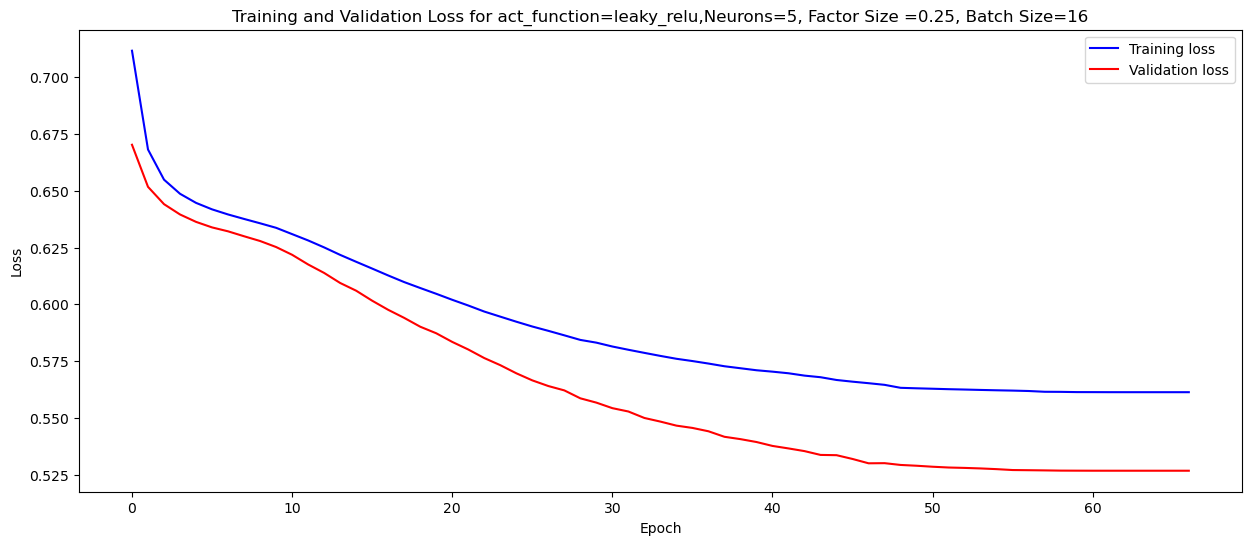


Epoch 68: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 75: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 79: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 81: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 82: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 83: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 84: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 85: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 86: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 87: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 88: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 89: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.
Restoring model weights from the end of the best epoch: 87.


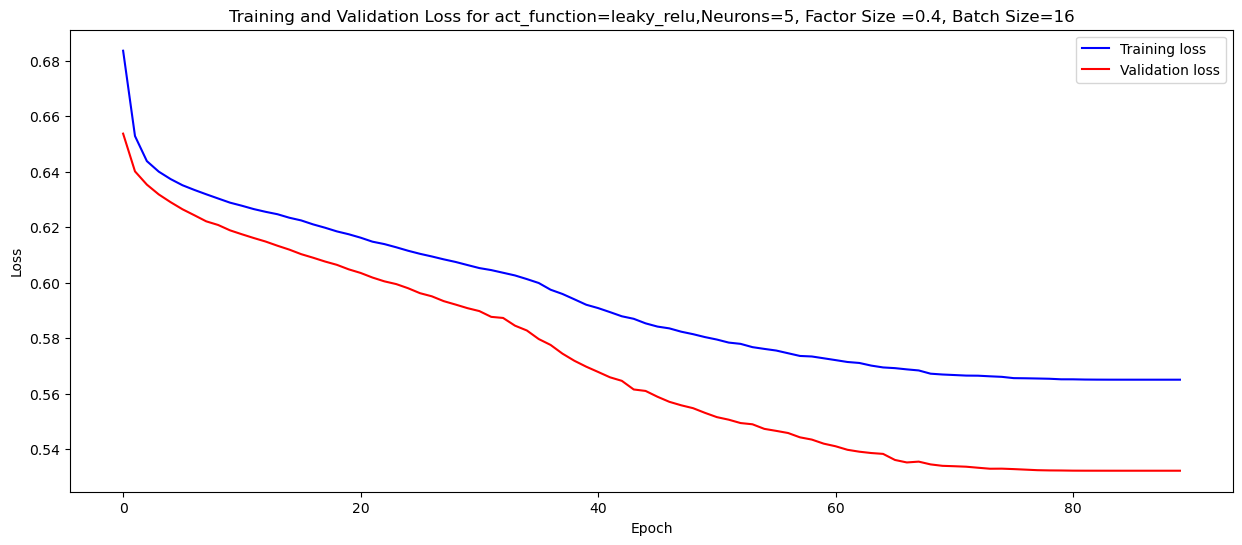


Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 69: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 72: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 74: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 75: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 76: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 78: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 79: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 80: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 81: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 82: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 83: ReduceLROnPlateau reducing learning rate to 1.22070

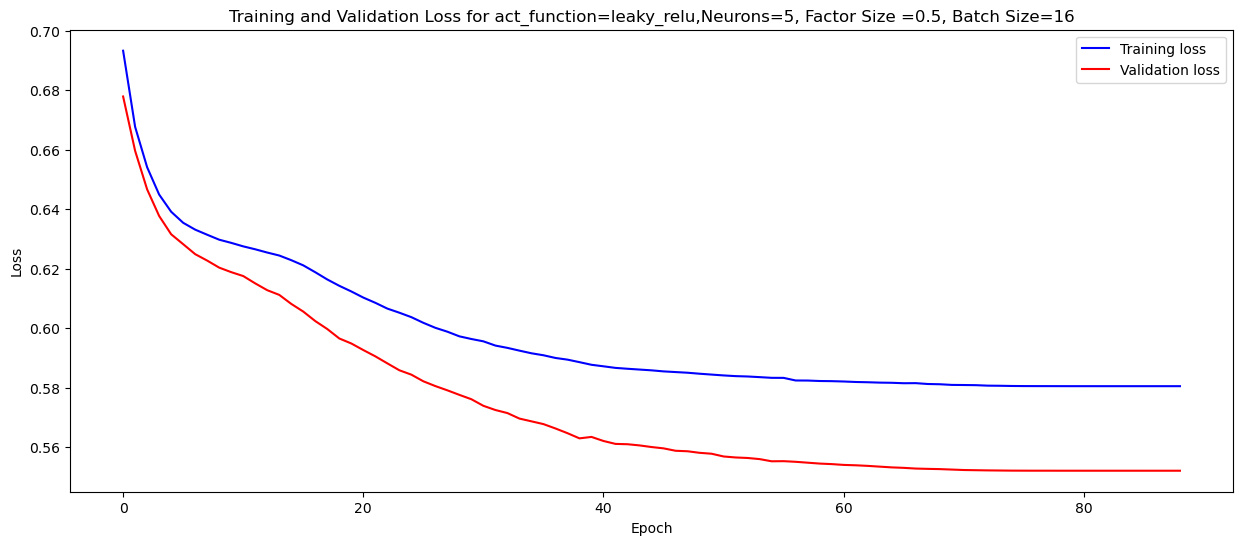


Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 51: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 54: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 55: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 56: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 57: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 58: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 59: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 60: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 58.

Epoch 61: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 61: early stopping


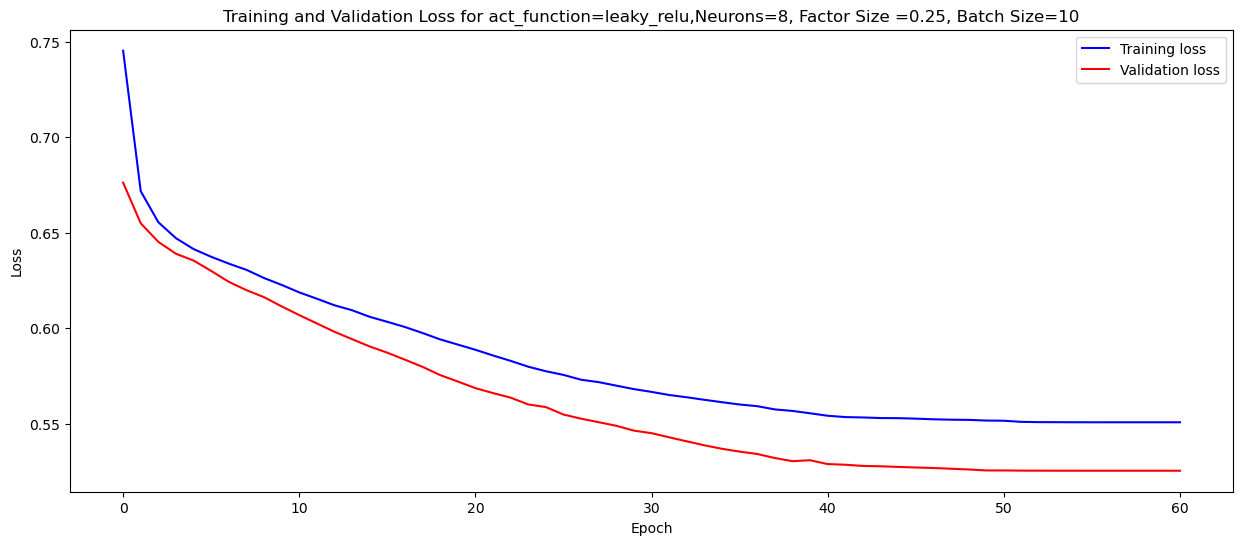


Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 39: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 41: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 42: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 43: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 44: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 45: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 46: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 47: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 48: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 49: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 50: ReduceLROnPlateau reducing learning rate to 6.710

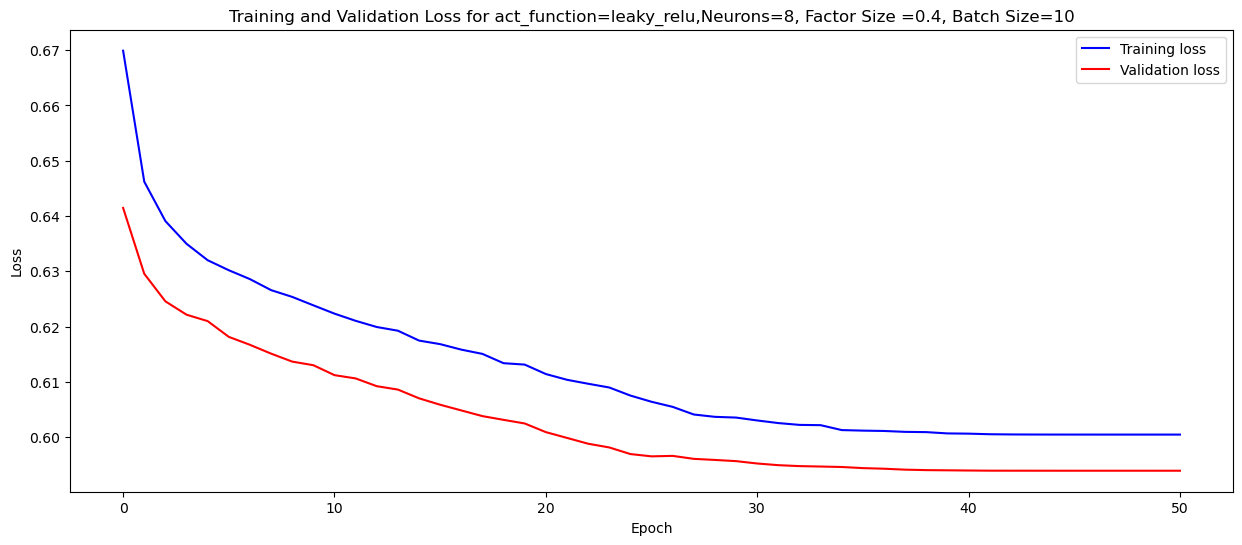


Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 54: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 56: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 60: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 61: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 63: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.22070

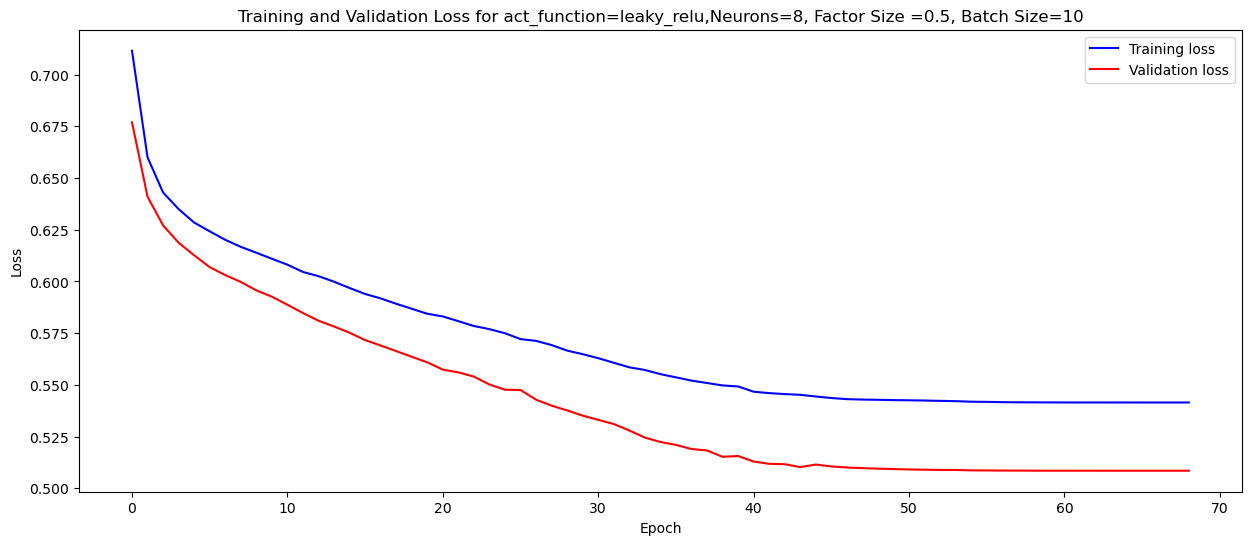


Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 77: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 81: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 83: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 84: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 85: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 86: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 87: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 88: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Restoring model weights from the end of the best epoch: 86.

Epoch 89: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 89: early stopping


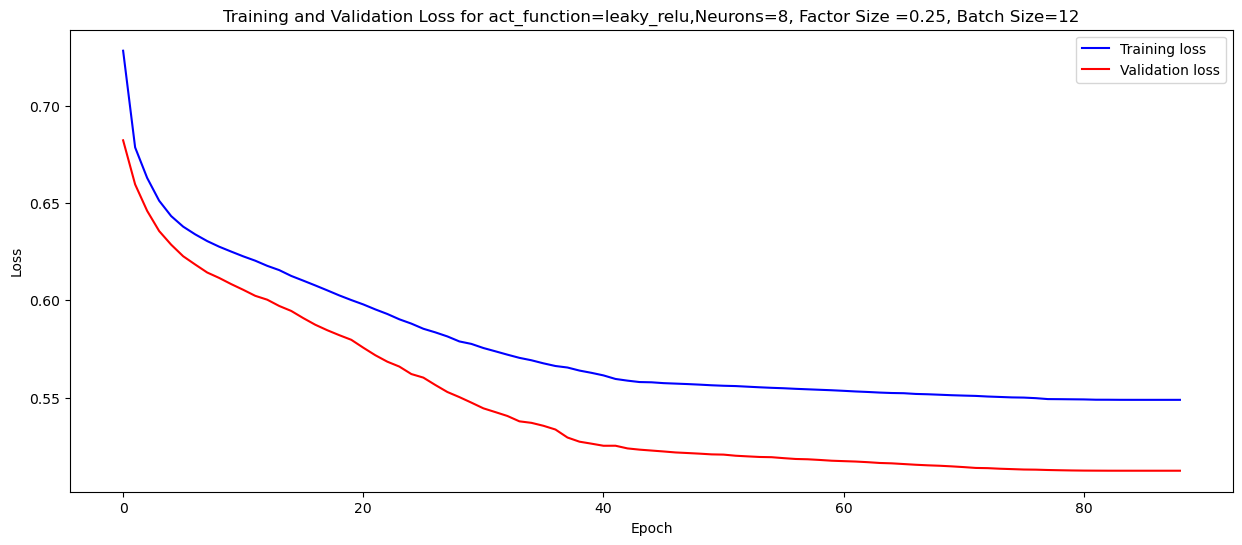


Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 57: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 63: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 65: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 67: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 68: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 69: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 70: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 71: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 72: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 73: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 74: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 75: ReduceLROnPlateau reducing learning rate to 6.710

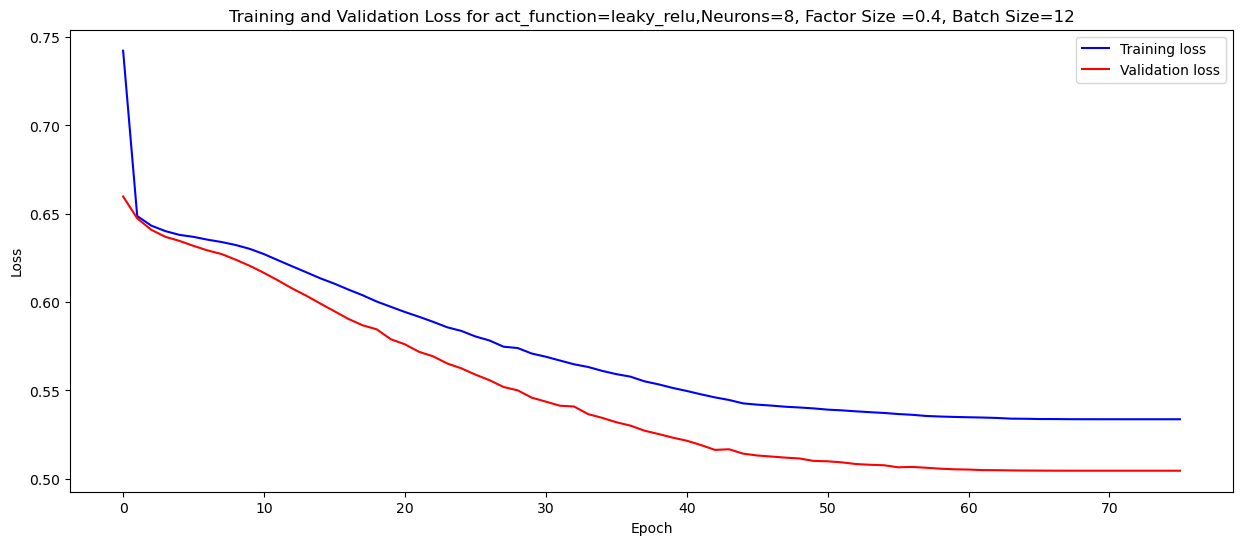


Epoch 57: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 94: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 102: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 105: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 106: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 108: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 109: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 110: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 111: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 112: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 113: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 114: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 115: ReduceLROnPlateau reducing learning rate

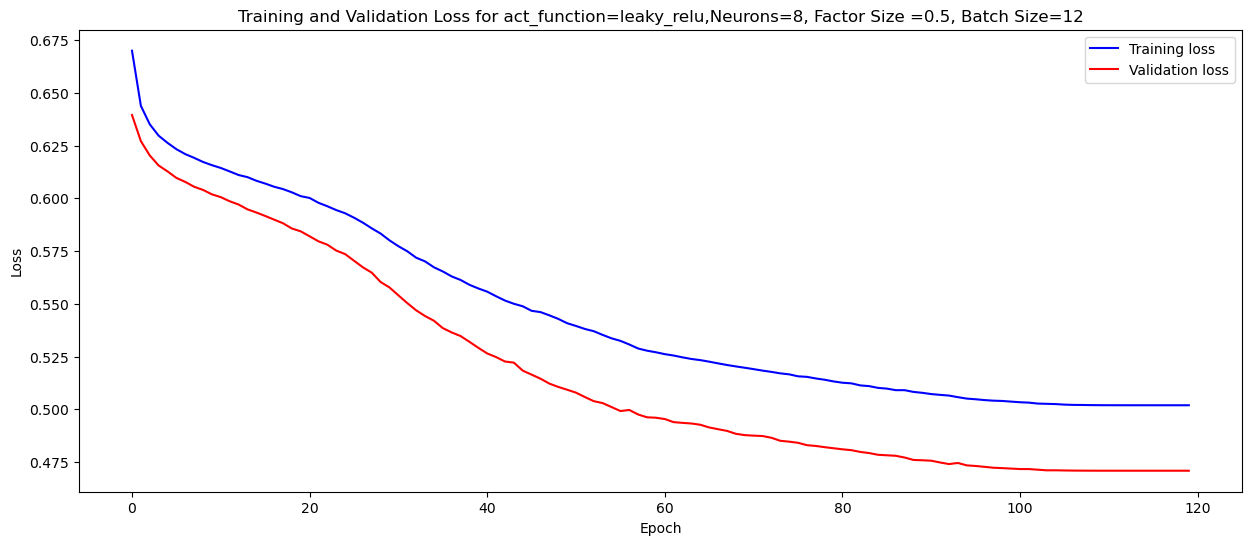


Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 58: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 63: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 64: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 66: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 67: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Restoring model weights from the end of the best epoch: 65.

Epoch 68: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 68: early stopping


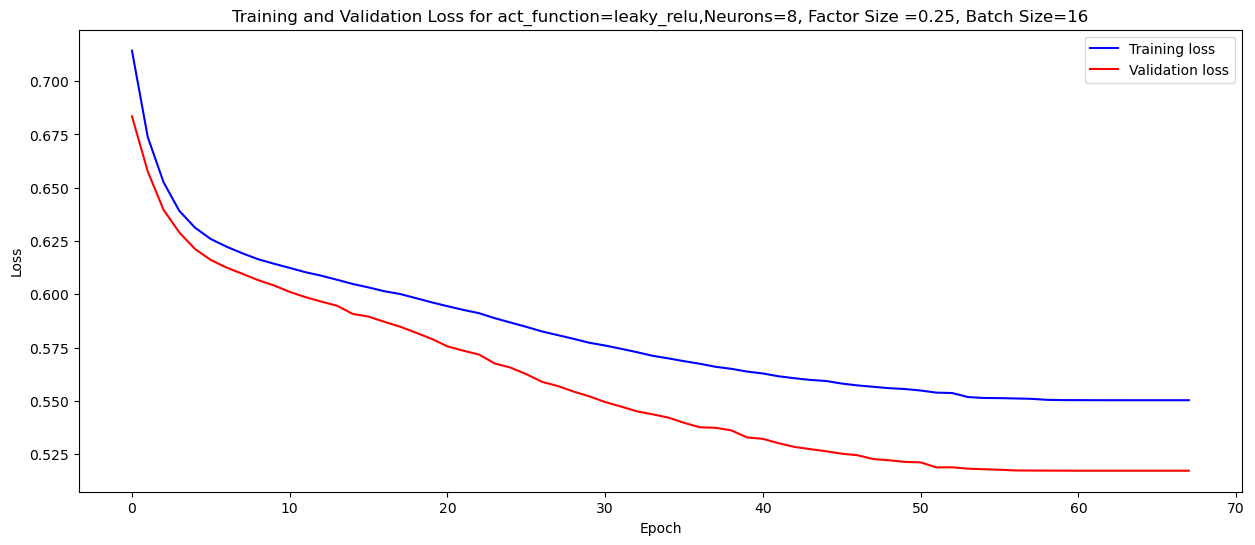


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 131: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 138: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 140: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 142: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 143: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 144: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 145: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 146: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 147: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 148: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 149: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.
Restoring model weights from the end of the best 

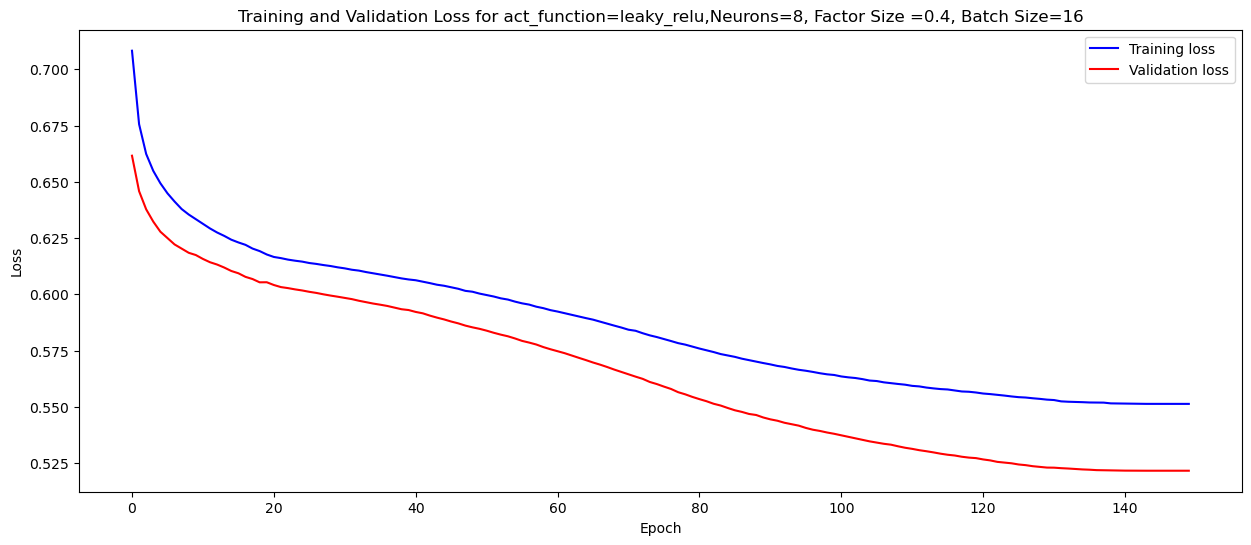


Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 67: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 73: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 80: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 82: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 83: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 84: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 86: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 87: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 88: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 89: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 90: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 91: ReduceLROnPlateau reducing learning rate to 1.22070

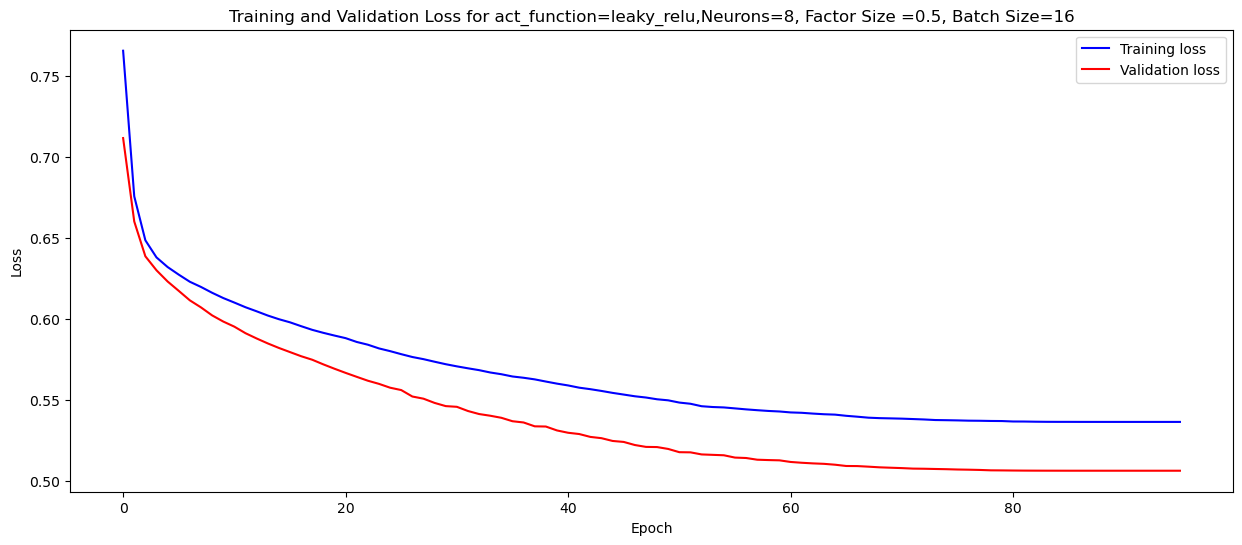


Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 91: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 100: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 102: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 103: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 104: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 105: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 106: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 107: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Restoring model weights from the end of the best epoch: 105.

Epoch 108: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 108: early stopping


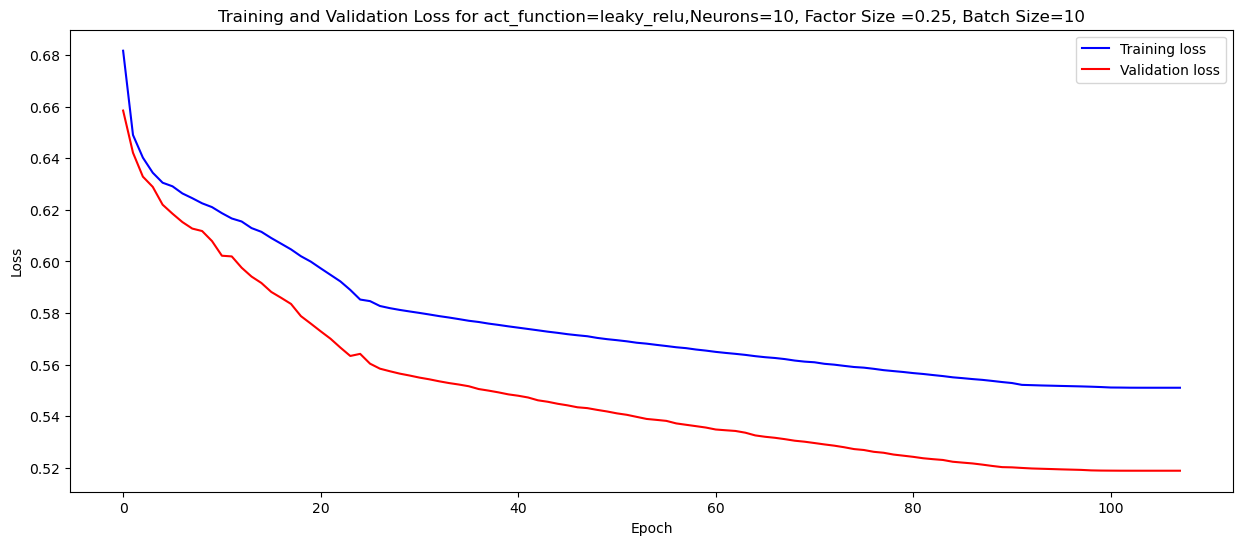


Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 45: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 47: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 49: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 50: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 51: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 52: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 53: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 54: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 55: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 57: ReduceLROnPlateau reducing learning rate to 6.710

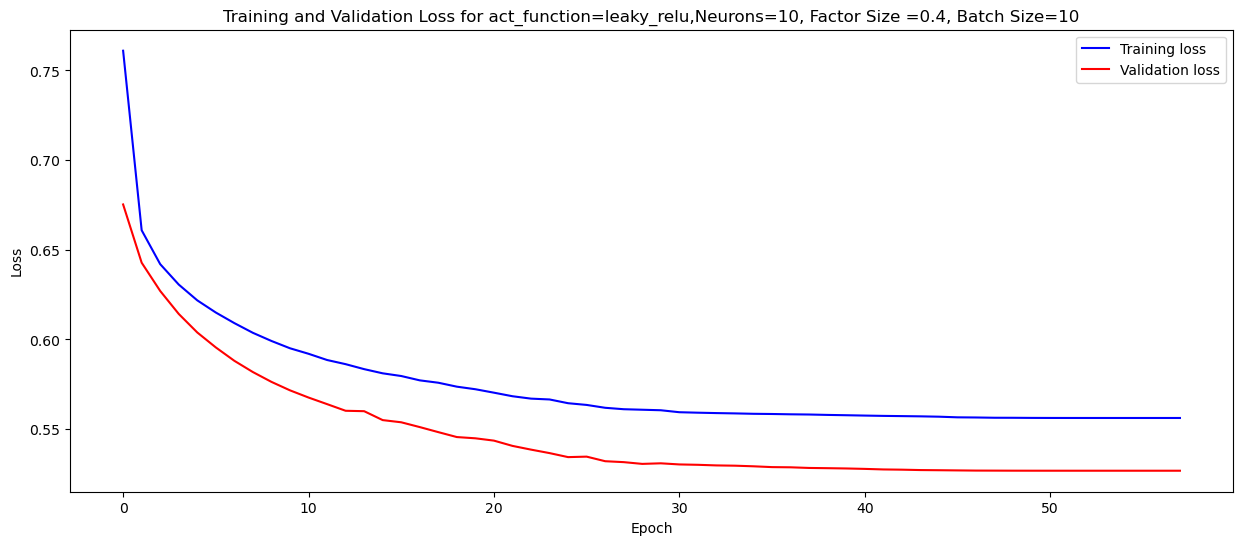


Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 66: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 68: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 69: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 71: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 72: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 73: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 74: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 75: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 76: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 77: ReduceLROnPlateau reducing learning rate to 1.22070

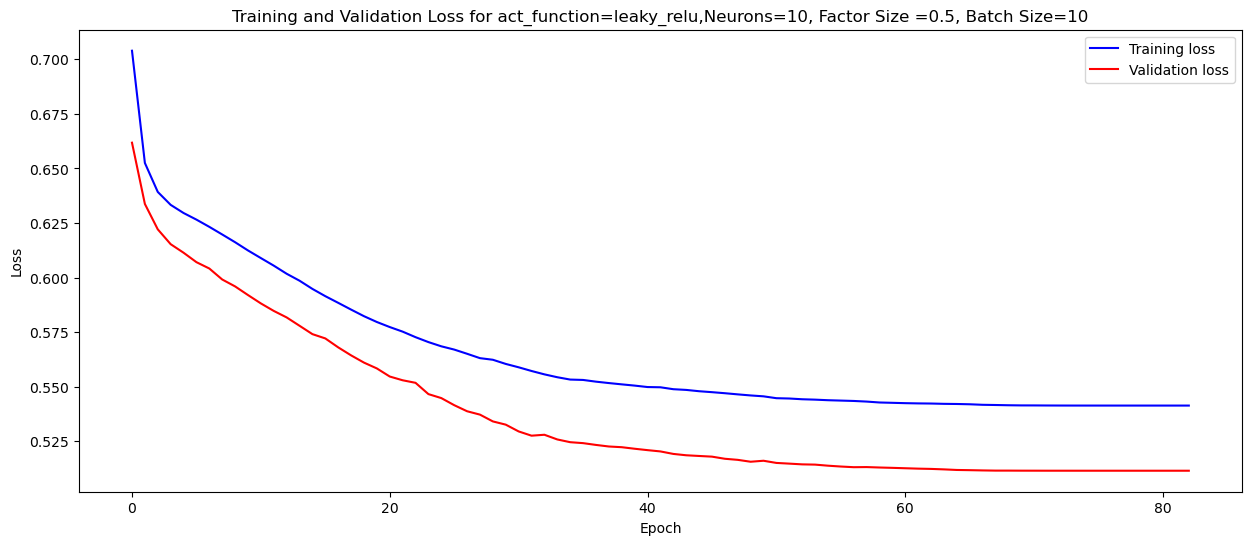


Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 64: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 66: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 68: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 69: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 70: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 71: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 72: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.

Epoch 73: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.

Epoch 74: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Restoring model weights from the end of the best epoch: 72.

Epoch 75: ReduceLROnPlateau reducing learning rate to 5.960464760645934e-11.
Ep

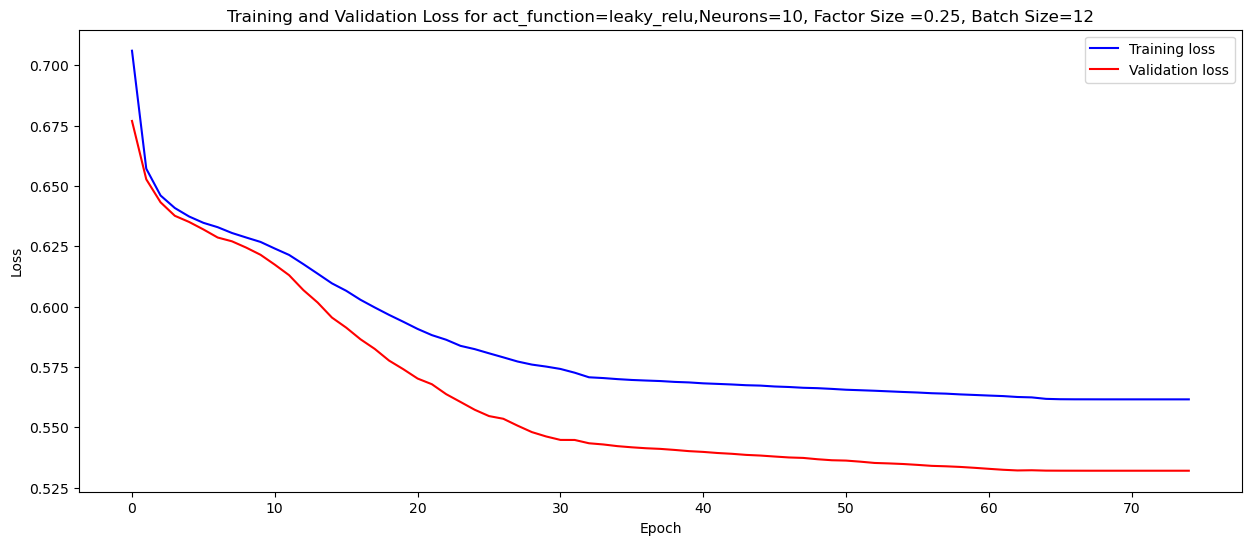


Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 59: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 64: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 66: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 67: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 68: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 69: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 70: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.
Restoring model weights from the end of the best epoch: 68.


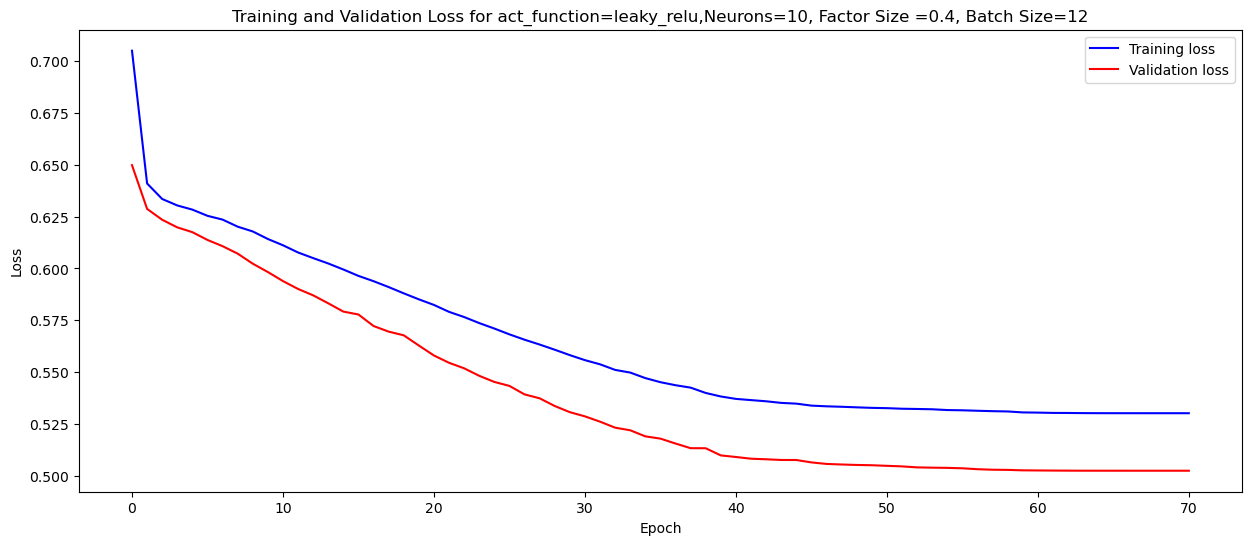


Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 53: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 55: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 57: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 58: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 60: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 61: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 62: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.22070

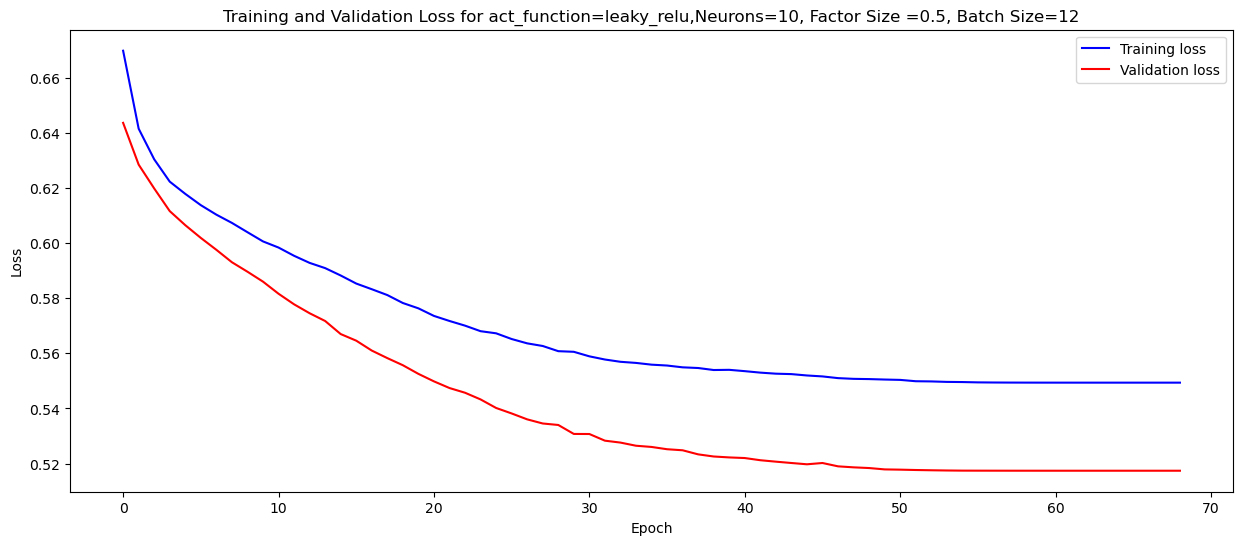


Epoch 48: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 97: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 99: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 100: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 101: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 102: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 103: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.

Epoch 104: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.

Epoch 105: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Restoring model weights from the end of the best epoch: 103.

Epoch 106: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
Epoch 106: early stopping


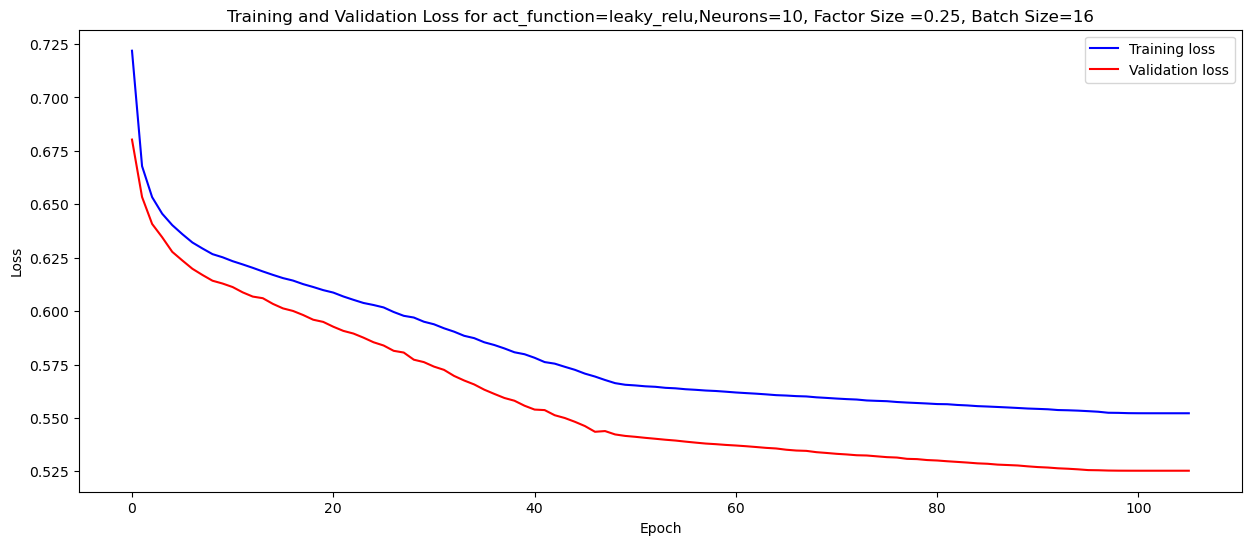


Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 55: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 62: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 64: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 66: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 67: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 68: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 69: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 70: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 71: ReduceLROnPlateau reducing learning rate to 6.710

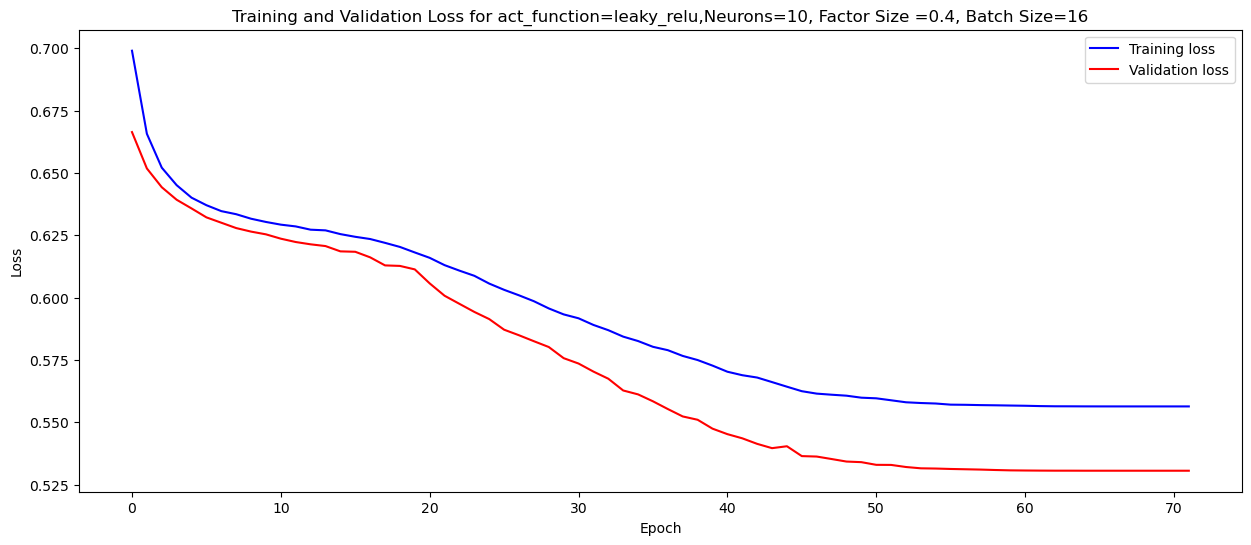


Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 62: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 64: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 66: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 67: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 69: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 70: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 71: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 72: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 73: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 74: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 75: ReduceLROnPlateau reducing learning rate to 1.22070

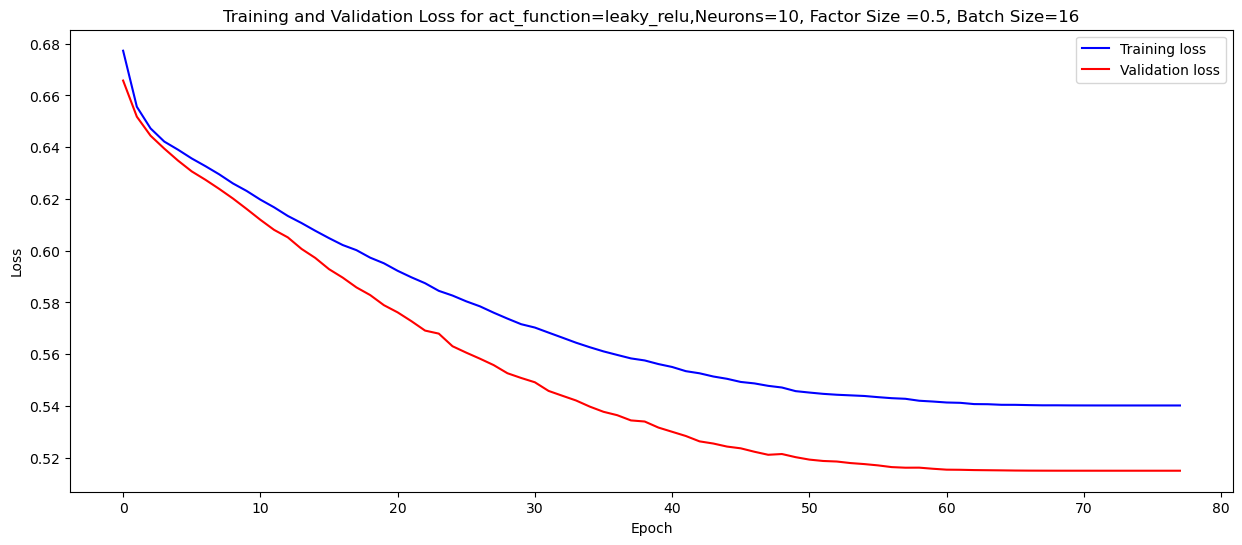

In [39]:
# NOTE THAT THIS STEP MAY TAKE A WHILE WHEN RUNNING! 

'''
We now systematically experiment with different configurations of a neural network model
by running the 'create_model' function with various combinations of parameters.

'''

# loop structure 

'''
Outer Loop (n):

Iterates over a list of numbers [5, 8, 10].
n represents the number of neurons in the hidden layer of the neural network. So, the model will be created with 5, 8, and 10 neurons in the hidden layer, respectively.
Middle Loop (bs):

Iterates over a list of batch sizes [10, 12, 16].
bs represents the batch size used during training. This determines how many samples are processed before the model's weights are updated.
Inner Loop (f):

Iterates over a list of learning rate reduction factors [0.25, 0.4, 0.5].
f represents the factor by which the learning rate is reduced when the validation loss plateaus.

''' 
for n in [5, 8, 10]:
        for bs in [10, 12, 16]:
                for f in [0.25, 0.4, 0.5]:
                        create_model('leaky_relu', n, f, bs)

In [41]:

'''
We now  sets up a neural network with one hidden layer using Leaky ReLU activation and one output layer with a 
sigmoid activation function. It configures the Adam optimizer and uses early stopping and learning rate reduction callbacks 
to improve training. Finally, it trains the model on the training data and monitors performance on validation data, 
with detailed control over training behavior and hyperparameter adjustments.

'''
# Model Initialization
final_model = keras.Sequential()

'''
 sets up a neural network with one hidden layer using Leaky ReLU activation and one output layer with a sigmoid activation function. 
 It configures the Adam optimizer and uses early stopping and learning rate reduction callbacks to improve training. 
 Finally, it trains the model on the training data and monitors performance on validation data, 
 with detailed control over training behavior and hyperparameter adjustments.

'''

# Adding Layers
final_model.add(keras.layers.Dense(units = 8, activation = 'leaky_relu', input_shape = (7,), kernel_initializer = tf.keras.initializers.LecunNormal()))

'''
keras.layers.Dense: Adds a dense (fully connected) layer to the model.
units=8:            The layer contains 8 neurons.
activation='leaky_relu': Uses the Leaky ReLU activation function. Leaky ReLU allows a small,
non-zero gradient when the unit is not active, which helps address issues like the vanishing gradient problem.
input_shape=(7,):   Specifies the shape of the input data, which has 7 features.
kernel_initializer=tf.keras.initializers.LecunNormal():   Initializes the weights using the LeCun normal initializer, 
which is suitable for layers with ReLU activations.

'''

final_model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

'''
keras.layers.Dense: Adds another dense layer with a single neuron.
units=1: The output layer has 1 neuron, which is appropriate for binary classification tasks.
activation='sigmoid': The sigmoid activation function is used to output probabilities between 0 and 1, 
which is suitable for binary classification.

'''

# Compiling the Model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.0001, clipnorm=True)
final_model.compile(optimizer = optimiser, loss = 'binary_crossentropy', metrics = ['accuracy'])
   # model.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=['accuracy'])

'''
tf.keras.optimizers.Adam: Configures the Adam optimizer.
learning_rate=0.001: Sets the learning rate for the optimizer.
epsilon=0.0001: A small constant added to prevent division by zero during optimization.
clipnorm=True: Clips the gradients during optimization to prevent exploding gradients.
model.compile(...): Compiles the model with the following parameters:
optimizer=optimiser: Uses the Adam optimizer configured above.
loss='binary_crossentropy': Uses binary cross-entropy as the loss function, suitable for binary classification tasks.
metrics=['accuracy']: Evaluates the model's performance using accuracy as a metric.
'''

# Callbacks
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=3, restore_best_weights=True)
rlrnop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=1, verbose=1)

'''
EarlyStopping: Monitors the validation loss (val_loss) during training and stops training if it
does not improve for 3 consecutive epochs. restore_best_weights=True ensures that the model 
weights are reverted to the best observed during training.

'''
# Training the Model 

log = final_model.fit(X_train, y_train, validation_data=(X_val_, y_val), epochs=150, batch_size=10, callbacks=[es, rlrnop], verbose=0)

'''
final_model.fit(...): Trains the model with the following parameters:
X_train and y_train: The training data and labels.
validation_data=(X_val_, y_val): The validation data and labels used to monitor the model's performance on unseen data.
epochs=150: Trains the model for up to 150 epochs.
batch_size=10: Updates the model's weights after processing 10 samples.
callbacks=[es, rlrnop]: Uses the early stopping and learning rate reduction callbacks defined earlier.
verbose=0: Suppresses training output messages.

'''

'''
*************************************************************************************************************
All in all, this code batch This code sets up a neural network with one hidden layer using Leaky ReLU activation and
one output layer with a sigmoid activation function. It configures the Adam optimizer and uses early stopping 
and learning rate reduction callbacks to improve training. Finally, it trains the model on the training data and 
monitors performance on validation data, with detailed control over training behavior and hyperparameter adjustments.
*************************************************************************************************************

'''


Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.

Epoch 58: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 62: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.

Epoch 63: ReduceLROnPlateau reducing learning rate to 1.6384001355618238e-06.

Epoch 64: ReduceLROnPlateau reducing learning rate to 6.553600542247295e-07.

Epoch 65: ReduceLROnPlateau reducing learning rate to 2.6214402168989184e-07.

Epoch 66: ReduceLROnPlateau reducing learning rate to 1.0485761094969349e-07.

Epoch 67: ReduceLROnPlateau reducing learning rate to 4.1943044948311586e-08.

Epoch 68: ReduceLROnPlateau reducing learning rate to 1.677721854775882e-08.

Epoch 69: ReduceLROnPlateau reducing learning rate to 6.710

'\n*************************************************************************************************************\nAll in all, this code batch This code sets up a neural network with one hidden layer using Leaky ReLU activation and\none output layer with a sigmoid activation function. It configures the Adam optimizer and uses early stopping \nand learning rate reduction callbacks to improve training. Finally, it trains the model on the training data and \nmonitors performance on validation data, with detailed control over training behavior and hyperparameter adjustments.\n*************************************************************************************************************\n\n'

23/23 [==============================] - 0s 669us/step
Accuracy: 0.6507503410641201
F1 Score: 0.5987460815047022
Recall Score: 0.5718562874251497


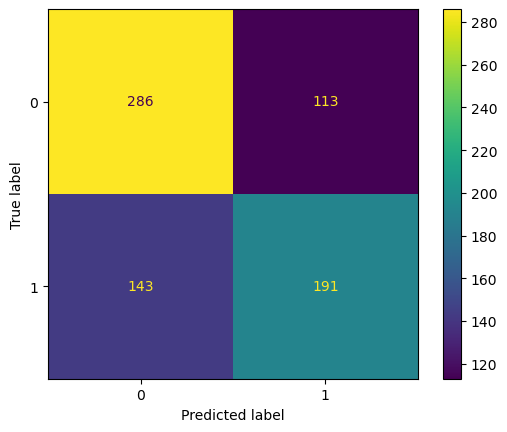

In [42]:
# Scaling the test set
X_test_ = sc.transform(X_test)

# Predicting the Test set results
y_pred = final_model.predict(X_test_)

y_pred = (y_pred > 0.5)

# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# disp.ax_.set_title('Confusion Matrix for Simple SVM with RBF Kernel')